<a href="https://colab.research.google.com/github/Eric-Mendes/estatisticas-quem-cair-calil/blob/main/notebooks/estudo_das_escalacoes_times_serios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESTUDO SOBRE AS ESCALAÇÕES**

In [1]:
RODADAS = 33

In [2]:
# importando as bibliotecas necessárias para estudar os dados
import numpy as np # matemática
import matplotlib.pyplot as plt # gráficos
import pandas as pd # tabelas

In [3]:
# importando os dados (do github)
url = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair-\
calil/main/data/escalacoes_times_serios_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df = pd.read_csv(url)
 
# informações da tabela
df.head()

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME
0,Gigante de JF,RODADA 33,RICHARD,GOLEIRO,-4.2,NÃO,CEARÁ
1,Gigante de JF,RODADA 33,CALEGARI,LATERAL,5.8,NÃO,FLUMINENSE
2,Gigante de JF,RODADA 33,GUILHERME ARANA,LATERAL,12.6,NÃO,ATLÉTICO MINEIRO
3,Gigante de JF,RODADA 33,LUCCAS CLARO,ZAGUEIRO,5.6,NÃO,FLUMINENSE
4,Gigante de JF,RODADA 33,JÚNIOR ALONSO,ZAGUEIRO,4.6,NÃO,ATLÉTICO MINEIRO


**TRATAMENTO DOS DADOS**

Tornando 'RODADA' um número inteiro:

In [4]:
df['RODADA'] = df['RODADA'].apply(lambda x: int(x.split()[1]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EQUIPE     1584 non-null   object 
 1   RODADA     1584 non-null   int64  
 2   JOGADOR    1584 non-null   object 
 3   POSIÇÃO    1584 non-null   object 
 4   PONTUAÇÃO  1584 non-null   float64
 5   CAPITÃO    1584 non-null   object 
 6   TIME       1579 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 86.8+ KB


Checando se há escalado sem time:

In [5]:
df.loc[df.TIME == '']

,EQUIPE,RODADA,JOGADOR,POSIÇÃO,PONTUAÇÃO,CAPITÃO,TIME


Não há!

Tirando o dobro da pontuação dos capitães para não enviesar as análises:

In [6]:
df['PONTUAÇÃO'] = df.apply(lambda x: x['PONTUAÇÃO'] if x['CAPITÃO'] == 'NÃO' 
                           else x['PONTUAÇÃO'] / 2, axis='columns')

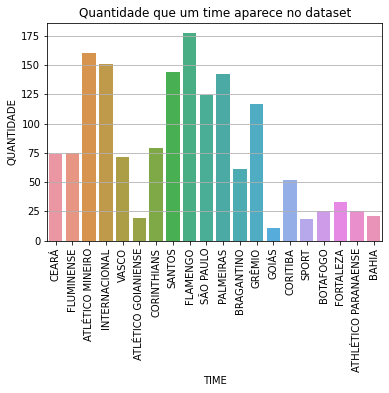

In [14]:
import seaborn as sns

sns.countplot(x="TIME", data=df)
plt.title("Quantidade que um time aparece no dataset")
plt.ylabel('QUANTIDADE')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

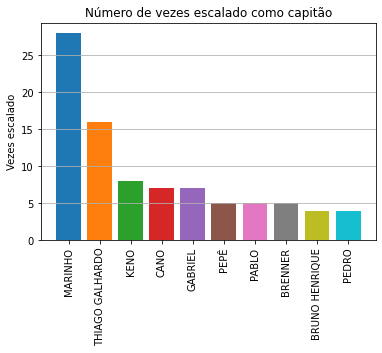

In [47]:
data = df["JOGADOR"].loc[df["CAPITÃO"] == "SIM"].value_counts()
plt.bar(x=data[:10].index, height=data[:10], color=sns.color_palette())
plt.xticks(rotation='vertical')
plt.ylabel('Vezes escalado')
plt.grid(axis='y')
plt.title('Número de vezes escalado como capitão')
plt.show()

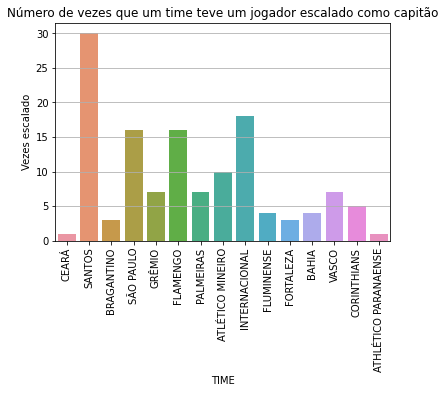

In [24]:
sns.countplot(x="TIME", data=df.loc[df["CAPITÃO"] == "SIM"])
plt.xticks(rotation='vertical')
plt.ylabel('Vezes escalado')
plt.grid(axis='y')
plt.title('Número de vezes que um time teve um jogador escalado como capitão')
plt.show()

In [138]:
def plot_times_escalados(equipe, i, j, ax):
  ax[i][j].tick_params("x", labelrotation=45)
  ax[i][j].grid(axis='y')
  data = df["TIME"].loc[df["EQUIPE"] == equipe].value_counts()
  ax[i][j].bar(x=data[:10].index, height=data[:10], color=sns.color_palette())
  if j == 0:
    ax[i][j].set_ylabel('Vezes escalado')
  ax[i][j].set_title(f'Os 10 times mais escalados ({equipe})')

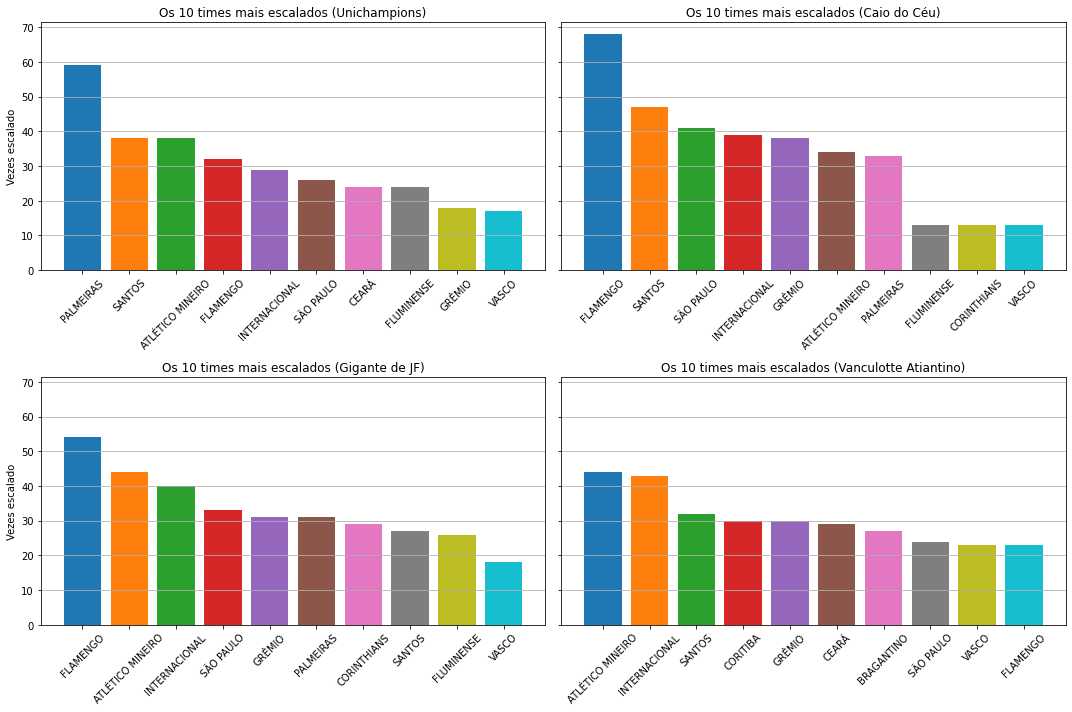

In [139]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

plot_times_escalados("Unichampions", 0, 0, ax)
plot_times_escalados('Caio do Céu', 0, 1, ax)
plot_times_escalados('Gigante de JF', 1, 0, ax)
plot_times_escalados('Vanculotte Atiantino', 1, 1, ax)
fig.tight_layout()
plt.show()

In [144]:
def plot_jogadores(time, equipe, i, j, ax):
  ax[i][j].tick_params("x", labelrotation=45)
  ax[i][j].grid(axis='y')
  data = df["JOGADOR"].loc[(df["EQUIPE"] == equipe) & (df["TIME"] == time)].value_counts()
  ax[i][j].bar(x=data[:10].index, height=data[:10], color=sns.color_palette())
  if j == 0:
    ax[i][j].set_ylabel('Vezes escalado')
  ax[i][j].set_title(f'Os 10 jogadores mais escalados do {time.title()} ({equipe})')

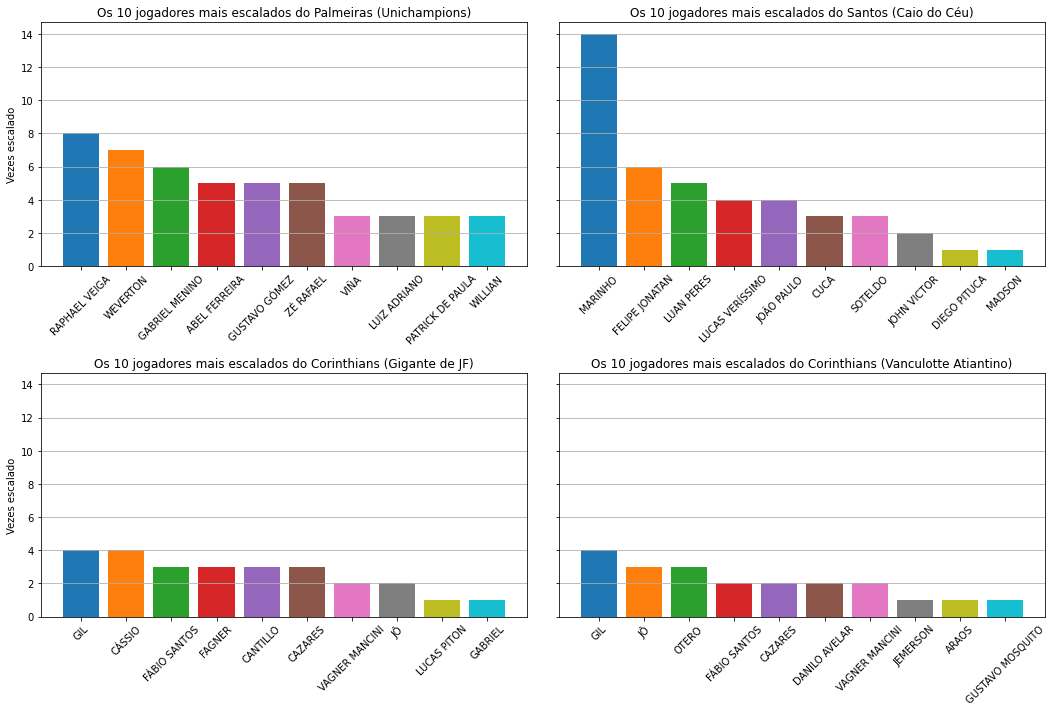

In [145]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

plot_jogadores("PALMEIRAS", "Unichampions", 0, 0, ax)
plot_jogadores("SANTOS", 'Caio do Céu', 0, 1, ax)
plot_jogadores("CORINTHIANS", 'Gigante de JF', 1, 0, ax)
plot_jogadores("CORINTHIANS", 'Vanculotte Atiantino', 1, 1, ax)
fig.tight_layout()
plt.show()

**CONTRIBUIÇÃO DOS 4 TIMES MAIS ESCALADOS PARA A PONTUAÇÃO TOTAL DAQUELA EQUIPE**

Vanculotte Atiantino

In [ ]:
coxa = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "CORITIBA")].sum()
              
atl = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "ATLÉTICO MINEIRO")].sum()

inter = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "INTERNACIONAL")].sum()
                  
santos = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino") & 
                    (df.TIME == "SANTOS")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Vanculotte Atiantino")].sum()

Porcentagem que contribuiu para a pontuação total (Vanculotte Atiantino)


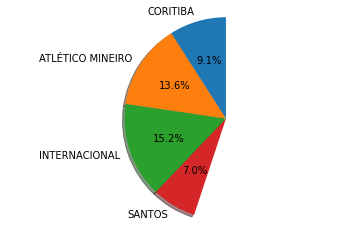

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'CORITIBA', 'ATLÉTICO MINEIRO', 'INTERNACIONAL', 'SANTOS'
sizes = [coxa/total_time, atl/total_time, inter/total_time, santos/total_time]

print("Porcentagem que contribuiu para a pontuação total (Vanculotte Atiantino)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Unichampions

In [ ]:
pal = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "PALMEIRAS")].sum()
              
atl = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "ATLÉTICO MINEIRO")].sum()

fla = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "FLAMENGO")].sum()
                  
santos = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions") & 
                    (df.TIME == "SANTOS")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Unichampions")].sum()

Porcentagem que contribuiu para a pontuação total (Unichampions)


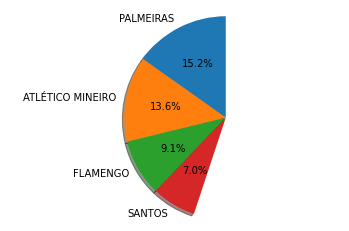

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'PALMEIRAS', 'ATLÉTICO MINEIRO', 'FLAMENGO', 'SANTOS'
sizes = [pal/total_time, atl/total_time, fla/total_time, santos/total_time]

print("Porcentagem que contribuiu para a pontuação total (Unichampions)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Gigante de JF

In [ ]:
inter = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "INTERNACIONAL")].sum()
              
atl = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "ATLÉTICO MINEIRO")].sum()

fla = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "FLAMENGO")].sum()
                  
spfc = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF") & 
                    (df.TIME == "SÃO PAULO")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Gigante de JF")].sum()

Porcentagem que contribuiu para a pontuação total (Gigante de JF)


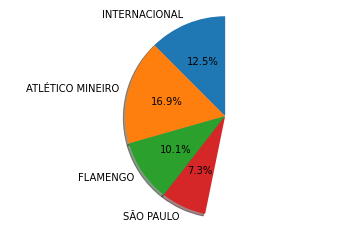

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'INTERNACIONAL', 'ATLÉTICO MINEIRO', 'FLAMENGO', 'SÃO PAULO'
sizes = [inter/total_time, atl/total_time, fla/total_time, spfc/total_time]

print("Porcentagem que contribuiu para a pontuação total (Gigante de JF)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Caio do Céu

In [ ]:
inter = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "INTERNACIONAL")].sum()
              
santos = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "SANTOS")].sum()

fla = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "FLAMENGO")].sum()
                  
spfc = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu") & 
                    (df.TIME == "SÃO PAULO")].sum()

total_time = df['PONTUAÇÃO'].loc[(df.EQUIPE == "Caio do Céu")].sum()

Porcentagem que contribuiu para a pontuação total (Caio do Céu)


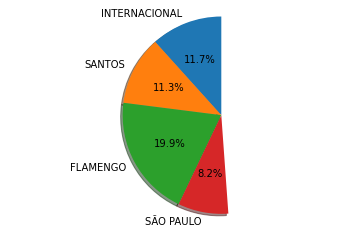

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'INTERNACIONAL', 'SANTOS', 'FLAMENGO', 'SÃO PAULO'
sizes = [inter/total_time, santos/total_time, fla/total_time, spfc/total_time]

print("Porcentagem que contribuiu para a pontuação total (Caio do Céu)")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()